<a href="https://colab.research.google.com/github/kimsang-kyu/Python_application/blob/main/20200518%EC%82%AC%ED%9B%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

실험계획법
 
 > 실험계획법은 실험을 통해 자료를 얻는 방법을 통정하는 것

> 실험 : 같은 조건의 개체들에게 분석목적에 맞는 처리르 가하는 과정

> 
 

In [ ]:
#기본검정
# 독립성, 정규성, 등분산성
# 정규성을 만족하는 경우 사용(만족하지 않을 경우 kruskal-walls 검정을 한다)

H0 : mu1 = mu2 = ... =mu n

H1 : H0가 사실이 아님4

영가설이 기각되면 다중비교를 통해 각 집단가의 처리효과를 볼 수 있음 

In [ ]:
#library
import pandas as pd

In [ ]:
#자료 입력
weight = [65,81,73,79,87,69,72,75,69,79,81,83,90,67,62,59,78,76,83,89,80,94,88]
group = ['A','A','A','A','A','A','B','B','B','B','B','B','B','C','C','C','C','C','C','D','D','D','D']
df = pd.DataFrame({"weight": weight,'group': group})

In [ ]:
df.head()

,weight,group
0,65,A
1,81,A
2,73,A
3,79,A
4,87,A


In [ ]:
!pip install easygui

In [ ]:
import easygui
df = pd.read_csv(easygui.fileopenbox())

In [ ]:
df.describe()

,weight
count,23.000000
mean,77.347826
std,9.315718
min,59.000000
25%,70.500000
50%,79.000000
75%,83.000000
max,94.000000


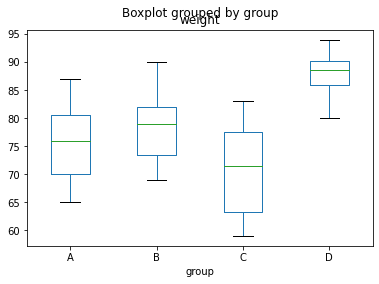

In [ ]:
# 그룹별 상자그림 - 연속형에서 제일 편함
df.boxplot(column='weight',by= 'group',grid = False)

In [ ]:
#그룹별ㅇ 평균
df.groupby(['group'])['weight'].mean()

group
A    75.666667
B    78.428571
C    70.833333
D    87.750000
Name: weight, dtype: float64

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats import anova as aov

In [ ]:
#### 일원배치 분산분석
fit = ols('weight~ group', data = df).fit()
###분산분석표
aov.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
group,3.0,712.586439,237.528813,3.771461,0.028041
Residual,19.0,1196.630952,62.980576,NaN,NaN


#사후 분석
 분산분석의 결과 영가설을 기각하는 경우 어느 집단간의 차이에서 기인하는지 검토

In [ ]:
###library
from statsmodels.stats import multicomp as mc

In [ ]:
#Tukey HSD
posthoc = mc.pairwise_tukeyhsd(df['weight'], df['group'], alpha = 0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   2.7619    0.9   -9.654 15.1778  False
     A      C  -4.8333 0.7014 -17.7179  8.0513  False
     A      D  12.0833   0.12  -2.3221 26.4887  False
     B      C  -7.5952 0.3414 -20.0111  4.8207  False
     B      D   9.3214  0.272  -4.6663 23.3092  False
     C      D  16.9167  0.018   2.5113 31.3221   True
-----------------------------------------------------


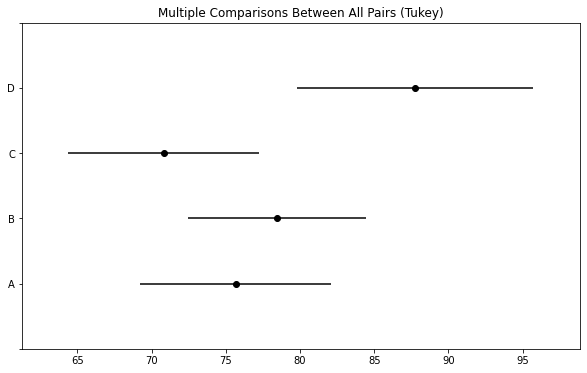

In [ ]:
fig = posthoc.plot_simultaneous()

In [ ]:
data_file ='https://vincentarelbundock.github.io/Rdatasets/csv/datasets/chickwts.csv'
chickwts = pd.read_csv(data_file)
chickwts = chickwts.drop(chickwts.columns[0], axis =1)

In [ ]:
chickwts.groupby(['feed'])['weight'].mean()

feed
casein       323.583333
horsebean    160.200000
linseed      218.750000
meatmeal     276.909091
soybean      246.428571
sunflower    328.916667
Name: weight, dtype: float64

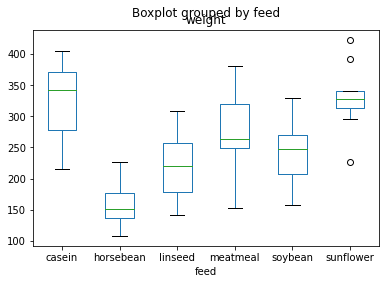

In [ ]:
# 그룹별 상자그림 - 연속형에서 제일 편함
chickwts.boxplot(column='weight',by= 'feed',grid = False)

H0 : mu1 = mu2 = mu3 = mu4 = mu5 = mu6
H1 : Not H0! (적어도 하나는 다르다)

In [ ]:
fit = ols('weight~ feed', data = chickwts).fit()
###분산분석표
aov.anova_lm(fit)
#0.00000000005 굉장히 작음
#영가설 기각, 대립가설 채택

,df,sum_sq,mean_sq,F,PR(>F)
feed,5.0,231129.162103,46225.832421,15.3648,5.936420e-10
Residual,65.0,195556.020996,3008.554169,NaN,NaN


In [ ]:
#Tukey HSD
posthoc = mc.pairwise_tukeyhsd(chickwts['weight'], chickwts['feed'], alpha = 0.05)
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower    upper   reject
--------------------------------------------------------------
   casein horsebean -163.3833  0.001 -232.3445 -94.4222   True
   casein   linseed -104.8333  0.001 -170.5852 -39.0814   True
   casein  meatmeal  -46.6742 0.3324 -113.9039  20.5554  False
   casein   soybean  -77.1548 0.0084 -140.5149 -13.7947   True
   casein sunflower    5.3333    0.9  -60.4186  71.0852  False
horsebean   linseed     58.55 0.1412  -10.4112 127.5112  False
horsebean  meatmeal  116.7091  0.001   46.3375 187.0806   True
horsebean   soybean   86.2286 0.0042    19.544 152.9132   True
horsebean sunflower  168.7167  0.001   99.7555 237.6778   True
  linseed  meatmeal   58.1591 0.1274   -9.0705 125.3887  False
  linseed   soybean   27.6786 0.7679  -35.6815  91.0387  False
  linseed sunflower  110.1667  0.001   44.4148 175.9186   True
 meatmeal   soybean  -30.4805 0.7133  -95.3729  34.4118

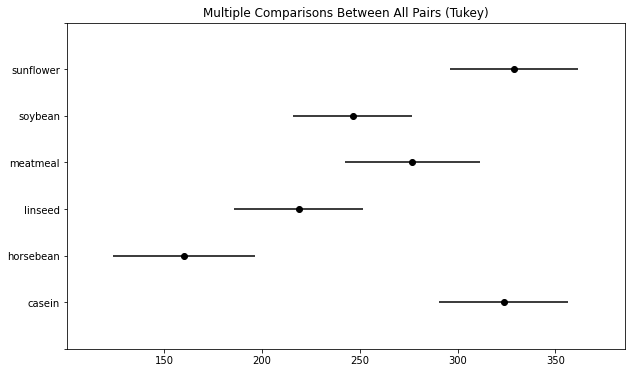

In [ ]:
fig = posthoc.plot_simultaneous()

> 결론 : 대립가설 채택, 적어도 한개는 다르다.